# Data Epoching

Extracting EEG Epoch for each specific tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mne.filter import filter_data

Import the raw data

In [37]:
df = pd.read_csv("data/2018-10-12-preston_walk_raw.csv", ",", skiprows=15)
channels = df.columns[1:8]
fs = 300
df.head()

,Time,LE,F4,C4,PO8,PO7,C3,F3,Trigger,Time_Offset,ADC_Status,ADC_Sequence,Event,Comments
0,0.0033,3642.0,-2536.8,3530.1,2459.4,296.7,3454.5,-1103.4,0,6,0,207,0,Start Data Acquisition
1,0.0067,3635.7,-2526.3,3531.0,2451.9,299.7,3459.6,-1098.9,0,12,0,208,0,NaN
2,0.0100,3632.7,-2535.9,3528.6,2441.4,302.1,3454.8,-1103.4,0,18,0,209,0,NaN
3,0.0133,3626.7,-2535.3,3524.1,2450.1,297.9,3455.1,-1097.1,0,24,0,210,0,NaN
4,0.0167,3626.4,-2527.8,3539.4,2469.0,289.8,3452.7,-1089.9,0,30,0,211,0,NaN


## Data Filtering
Let's filter the data into various frequency bands to calculate power over time for each respective band.

Delta (0-4), Theta (4-7), Alpha (8-12), Beta (12-30), Gamma (30+)

### Delta (0-4 Hz)

In [70]:
low = 0.1
high = 4
filtered = filter_data(df[df.columns[1:8]].values.T, fs, low, high)

# Calculate Power
power = abs(scisig.hilbert(filtered))**2

# Save power in the data frame format
df_delta = pd.DataFrame(power.T)
df_delta.columns = channels
df_delta['Time'] = df['Time']

# Bring the time column to the front
cols = list(df_delta)
cols.insert(0, cols.pop(cols.index('Time')))
df_delta = df_delta.loc[:, cols]

df_delta.head()

Setting up band-pass filter from 0.1 - 4 Hz
l_trans_bandwidth chosen to be 0.1 Hz
h_trans_bandwidth chosen to be 2.0 Hz
Filter length of 9901 samples (33.003 sec) selected


C:\Users\nilew\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


,Time,LE,F4,C4,PO8,PO7,C3,F3
0,0.0033,151729.915308,204004.091642,201105.492833,78656.498360,62577.292971,57751.607173,4947.422666
1,0.0067,150949.376870,205758.322784,201689.636552,78193.226987,62073.283984,58408.855558,5385.111827
2,0.0100,149945.864094,205521.990747,201323.793253,77529.027296,61446.207240,58585.809918,5507.823397
3,0.0133,149182.584151,205317.501139,200980.750921,76985.460083,61001.082944,58707.289296,5646.082121
4,0.0167,148343.582666,204399.598976,200305.838113,76368.657780,60507.823729,58652.526513,5676.927881


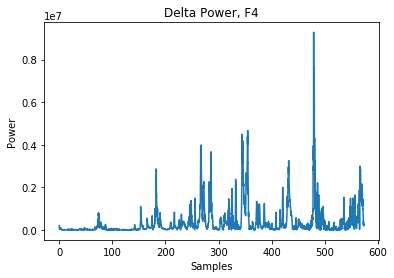

In [67]:
# Plot one channel to check
plt.figure
plt.plot(df_delta.Time, df_delta.F4)
plt.xlabel('Samples')
plt.ylabel('Power')
plt.title('Delta Power, F4')
plt.show()

### Theta (4-7 Hz)

In [71]:
low = 4
high = 7
filtered = filter_data(df[df.columns[1:8]].values.T, fs, low, high)

# Calculate Power
power = abs(scisig.hilbert(filtered))**2

# Save power in the data frame format
df_theta = pd.DataFrame(power.T)
df_theta.columns = channels
df_theta['Time'] = df['Time']

# Bring the time column to the front
cols = list(df_theta)
cols.insert(0, cols.pop(cols.index('Time')))
df_theta = df_theta.loc[:, cols]

Setting up band-pass filter from 4 - 7 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 2.0 Hz
Filter length of 495 samples (1.650 sec) selected


C:\Users\nilew\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


### Alpha (8-12 Hz)

In [73]:
low = 8
high = 12
filtered = filter_data(df[df.columns[1:8]].values.T, fs, low, high)

# Calculate Power
power = abs(scisig.hilbert(filtered))**2

# Save power in the data frame format
df_alpha = pd.DataFrame(power.T)
df_alpha.columns = channels
df_alpha['Time'] = df['Time']

# Bring the time column to the front
cols = list(df_alpha)
cols.insert(0, cols.pop(cols.index('Time')))
df_alpha = df_alpha.loc[:, cols]

Setting up band-pass filter from 8 - 12 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 3.0 Hz
Filter length of 495 samples (1.650 sec) selected


C:\Users\nilew\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


### Beta (12-30 Hz)

In [72]:
low = 12
high = 30
filtered = filter_data(df[df.columns[1:8]].values.T, fs, low, high)

# Calculate Power
power = abs(scisig.hilbert(filtered))**2

# Save power in the data frame format
df_beta = pd.DataFrame(power.T)
df_beta.columns = channels
df_beta['Time'] = df['Time']

# Bring the time column to the front
cols = list(df_beta)
cols.insert(0, cols.pop(cols.index('Time')))
df_beta = df_beta.loc[:, cols]

Setting up band-pass filter from 12 - 30 Hz
l_trans_bandwidth chosen to be 3.0 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 331 samples (1.103 sec) selected


C:\Users\nilew\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


### Gamma (30-50 Hz)

In [74]:
low = 30
high = 50
filtered = filter_data(df[df.columns[1:8]].values.T, fs, low, high)

# Calculate Power
power = abs(scisig.hilbert(filtered))**2

# Save power in the data frame format
df_gamma = pd.DataFrame(power.T)
df_gamma.columns = channels
df_gamma['Time'] = df['Time']

# Bring the time column to the front
cols = list(df_gamma)
cols.insert(0, cols.pop(cols.index('Time')))
df_gamma = df_gamma.loc[:, cols]

Setting up band-pass filter from 30 - 50 Hz
l_trans_bandwidth chosen to be 7.5 Hz
h_trans_bandwidth chosen to be 12.5 Hz
Filter length of 133 samples (0.443 sec) selected


C:\Users\nilew\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]


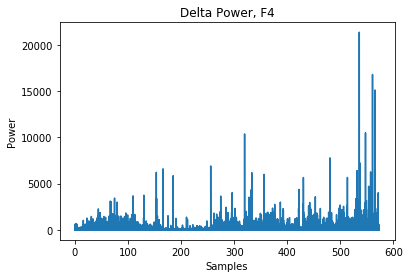

In [75]:
# Plot one channel to check
plt.figure
plt.plot(df_gamma.Time, df_gamma.F4)
plt.xlabel('Samples')
plt.ylabel('Power')
plt.title('Delta Power, F4')
plt.show()

Now we have multiple dataframes. One containing the raw EEG data (`df`), another containing the delta band power (`df_delta`), another with the theta band power (`df_theta`), etc. until `df_gamma`.

## Extract EEG
Now let's extract when certain events were happening, and then further extract small epochs sliding across the large time frames.

Event | Task
------|------
5   | Typing
6   | Talking
7   | Walking

The order in which we recorded was 7 -> 5 -> 6 -> 7

First, get the indices

In [6]:
typing_index = df.loc[df['Event'] == 5].index[0]
talking_index = df.loc[df['Event'] == 6].index[0]
walking_index = df.loc[df['Event'] == 7].index
walking_1 = walking_index[0]
walking_2 = walking_index[1]

In [7]:
# Create a buffer to avoid transitions
buffer = 1 * fs

In [8]:
# For raw EEG
first_walking = df.loc[walking_1 + buffer : typing_index - buffer]
typing = df.loc[typing_index + buffer : talking_index - buffer]
talking = df.loc[talking_index + buffer : walking_2 - buffer]
second_walking = df.loc[walking_2 + buffer: len(df) - buffer]

In [76]:
# For all the frequency bands

In [77]:
# Using a sliding window to extract small 3 second? epochs
# Each epoch consists of voltage or power data
# Each epoch has the following properties: channel, frequency band, event type